In [1]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Read csv file

In [2]:
DATA_PATH = '../크롤링/data/'
filepath = "omniscient-reader_Episode_kr_24.csv"
df = pd.read_csv(DATA_PATH+filepath)
df.head()

,Episode,Date,Review
0,24,19시간 전,저 파브르는 훗날 강형욱을 만나게 된다.이 정도는 스포 아니지?
1,24,2022-10-03 12:53,그러네 미궁 실로 탈출하기 그리스로마신화네
2,24,2022-09-28 03:31,뭐야 왜저래
3,24,2022-09-27 03:19,아리아드네나 테세우스가 후원자인가보군
4,24,2022-09-18 15:59,미로를 틸출하는 실? 이거 그리스 로마 신화에 나오는 내용이잖아 ㅋㅋㅋㅋㅋㅋㅋㅋ


In [3]:
df.tail()

,Episode,Date,Review
4389,24,2020-09-22 23:05,나왔다
4390,24,2020-09-22 23:05,빨랐다
4391,24,2020-09-22 23:05,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
4392,24,2020-09-22 23:05,1
4393,24,2020-09-22 23:05,1


# Review를 문장단위의 리스트로 저장

In [4]:
review_list = df['Review'].values
review_list[:10]

array(['저 파브르는 훗날 강형욱을 만나게 된다.이 정도는 스포 아니지?', '그러네 미궁 실로 탈출하기 그리스로마신화네',
       '뭐야 왜저래 ', '아리아드네나 테세우스가 후원자인가보군',
       '미로를 틸출하는 실? 이거 그리스 로마 신화에 나오는 내용이잖아 ㅋㅋㅋㅋㅋㅋㅋㅋ',
       '처음부터 금호역 사람들 서술할 때 이 사람들은 살인자다 라고 한 거 덕분에 저렇게 팔 잘라도 괜찮게 볼 수 있는듯',
       '고구마가 아니라서 넘 좋다', '독자ㅋㅋㅋㅋㅋ 기존쎄', '도깨비 왤케 귀여움?ㅋㅋ',
       '와 고구마 절대 안먹을듯 만약 하나 먹어도 사이다를 100개씩 주네'], dtype=object)

# Convert "Review" to string and Save as a text file

In [5]:
df['Review'].values
document = ''.join(df['Review'].values)
print(document)

filepath = "omniscient-reader_Episode_kr_24.txt"
f = open(DATA_PATH + filepath, 'w')
f.write(document)
f.close()

저 파브르는 훗날 강형욱을 만나게 된다.이 정도는 스포 아니지?그러네 미궁 실로 탈출하기 그리스로마신화네뭐야 왜저래 아리아드네나 테세우스가 후원자인가보군미로를 틸출하는 실? 이거 그리스 로마 신화에 나오는 내용이잖아 ㅋㅋㅋㅋㅋㅋㅋㅋ처음부터 금호역 사람들 서술할 때 이 사람들은 살인자다 라고 한 거 덕분에 저렇게 팔 잘라도 괜찮게 볼 수 있는듯고구마가 아니라서 넘 좋다독자ㅋㅋㅋㅋㅋ 기존쎄도깨비 왤케 귀여움?ㅋㅋ와 고구마 절대 안먹을듯 만약 하나 먹어도 사이다를 100개씩 주네맡겨놨나 뭘 돌려주세요야진짜 극혐이네 새끼들직장인이 벌크업해서 먼치킨이 되었어요!근데 죽여도 코인 못 얻잖아오빠 멋져요 사랑해요금쪽같은 내 새꾸원래 저런 상황에서 도움이 안되는 도태된 인간들은 사라지는게 맞지개간지희원: 그 칼은요?독자: 제겁니다 제 마음대로 할 수 있습니다흐어어어어ㅓ어어어엉 ㅠㅠㅠㅠ 비형아  ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 왔니? ㅠㅠ기생충같은 것들 ㅡㅡ존잘 결혼해줘정의 공정 분배 외치며 선동하는 자들을 조심해야한다 그들은 속셈이 있는 자들이다은밀한 모략가가 뭐가잇다 이거진짜임자닌해아 마지막 컷 넘멋져요즘은 이런걸 가스 라이팅이라고 하던데맞나요?개사이다진짜와ㅏㅏ 사람 팔 자르는 거 존나 속시원하고 좋다 휴ㅠ인호새기는 뭔 독자를 OOO으로 아네 그냥 다 썰수 있는거 계속 살려주고왔더니만실푸는거면 아무리봐도... 그리스로마신화에서 
미노타잡고 라비린토스 탈출할때 
테세우스?가 실타래묶어뒀다가 
다시 따라가서 탈출한 그거지?
아리아드네 공주...던가?드디어 돌아왔구나 비형쿤~하 오랜만에 고구마 없는 전개다고기가 무슨 몸집만햌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ와 존나 쎄해... 개좋아하아하아하아하아하아사이다..독자 넘 맘에 든다 보면 볼수록 시원하누사이다 ㅎㅎ와 존나 카리스마 있어독자 무조건 선이 아니라 딱 상황 따라서 움직이는거 너무 멋있음,,, 성격이 엄청 입체적이게 느껴진다 ㅜ.ㅜ사이다~~크그냥 다 죽이자주인공이 저런성격일수 밖에 없는게 우리도 웹툰보면서 답답해 하잖어 근데 저녀석은 소설보면서 얼마나

In [6]:
filepath = "omniscient-reader_Episode_kr_24.txt"
f = open(DATA_PATH + filepath, 'r')
document = f.read()
f.close()
print(document)

저 파브르는 훗날 강형욱을 만나게 된다.이 정도는 스포 아니지?그러네 미궁 실로 탈출하기 그리스로마신화네뭐야 왜저래 아리아드네나 테세우스가 후원자인가보군미로를 틸출하는 실? 이거 그리스 로마 신화에 나오는 내용이잖아 ㅋㅋㅋㅋㅋㅋㅋㅋ처음부터 금호역 사람들 서술할 때 이 사람들은 살인자다 라고 한 거 덕분에 저렇게 팔 잘라도 괜찮게 볼 수 있는듯고구마가 아니라서 넘 좋다독자ㅋㅋㅋㅋㅋ 기존쎄도깨비 왤케 귀여움?ㅋㅋ와 고구마 절대 안먹을듯 만약 하나 먹어도 사이다를 100개씩 주네맡겨놨나 뭘 돌려주세요야진짜 극혐이네 새끼들직장인이 벌크업해서 먼치킨이 되었어요!근데 죽여도 코인 못 얻잖아오빠 멋져요 사랑해요금쪽같은 내 새꾸원래 저런 상황에서 도움이 안되는 도태된 인간들은 사라지는게 맞지개간지희원: 그 칼은요?독자: 제겁니다 제 마음대로 할 수 있습니다흐어어어어ㅓ어어어엉 ㅠㅠㅠㅠ 비형아  ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 왔니? ㅠㅠ기생충같은 것들 ㅡㅡ존잘 결혼해줘정의 공정 분배 외치며 선동하는 자들을 조심해야한다 그들은 속셈이 있는 자들이다은밀한 모략가가 뭐가잇다 이거진짜임자닌해아 마지막 컷 넘멋져요즘은 이런걸 가스 라이팅이라고 하던데맞나요?개사이다진짜와ㅏㅏ 사람 팔 자르는 거 존나 속시원하고 좋다 휴ㅠ인호새기는 뭔 독자를 OOO으로 아네 그냥 다 썰수 있는거 계속 살려주고왔더니만실푸는거면 아무리봐도... 그리스로마신화에서 
미노타잡고 라비린토스 탈출할때 
테세우스?가 실타래묶어뒀다가 
다시 따라가서 탈출한 그거지?
아리아드네 공주...던가?드디어 돌아왔구나 비형쿤~하 오랜만에 고구마 없는 전개다고기가 무슨 몸집만햌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ와 존나 쎄해... 개좋아하아하아하아하아하아사이다..독자 넘 맘에 든다 보면 볼수록 시원하누사이다 ㅎㅎ와 존나 카리스마 있어독자 무조건 선이 아니라 딱 상황 따라서 움직이는거 너무 멋있음,,, 성격이 엄청 입체적이게 느껴진다 ㅜ.ㅜ사이다~~크그냥 다 죽이자주인공이 저런성격일수 밖에 없는게 우리도 웹툰보면서 답답해 하잖어 근데 저녀석은 소설보면서 얼마나

# 한국어 전처리

# 1. 크롤링한 데이터이므로 HTML TAG 제거

In [7]:
document1 = BeautifulSoup(document, 'html.parser').get_text() # .text
print(document1[:1000])

저 파브르는 훗날 강형욱을 만나게 된다.이 정도는 스포 아니지?그러네 미궁 실로 탈출하기 그리스로마신화네뭐야 왜저래 아리아드네나 테세우스가 후원자인가보군미로를 틸출하는 실? 이거 그리스 로마 신화에 나오는 내용이잖아 ㅋㅋㅋㅋㅋㅋㅋㅋ처음부터 금호역 사람들 서술할 때 이 사람들은 살인자다 라고 한 거 덕분에 저렇게 팔 잘라도 괜찮게 볼 수 있는듯고구마가 아니라서 넘 좋다독자ㅋㅋㅋㅋㅋ 기존쎄도깨비 왤케 귀여움?ㅋㅋ와 고구마 절대 안먹을듯 만약 하나 먹어도 사이다를 100개씩 주네맡겨놨나 뭘 돌려주세요야진짜 극혐이네 새끼들직장인이 벌크업해서 먼치킨이 되었어요!근데 죽여도 코인 못 얻잖아오빠 멋져요 사랑해요금쪽같은 내 새꾸원래 저런 상황에서 도움이 안되는 도태된 인간들은 사라지는게 맞지개간지희원: 그 칼은요?독자: 제겁니다 제 마음대로 할 수 있습니다흐어어어어ㅓ어어어엉 ㅠㅠㅠㅠ 비형아  ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 왔니? ㅠㅠ기생충같은 것들 ㅡㅡ존잘 결혼해줘정의 공정 분배 외치며 선동하는 자들을 조심해야한다 그들은 속셈이 있는 자들이다은밀한 모략가가 뭐가잇다 이거진짜임자닌해아 마지막 컷 넘멋져요즘은 이런걸 가스 라이팅이라고 하던데맞나요?개사이다진짜와ㅏㅏ 사람 팔 자르는 거 존나 속시원하고 좋다 휴ㅠ인호새기는 뭔 독자를 OOO으로 아네 그냥 다 썰수 있는거 계속 살려주고왔더니만실푸는거면 아무리봐도... 그리스로마신화에서 
미노타잡고 라비린토스 탈출할때 
테세우스?가 실타래묶어뒀다가 
다시 따라가서 탈출한 그거지?
아리아드네 공주...던가?드디어 돌아왔구나 비형쿤~하 오랜만에 고구마 없는 전개다고기가 무슨 몸집만햌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ와 존나 쎄해... 개좋아하아하아하아하아하아사이다..독자 넘 맘에 든다 보면 볼수록 시원하누사이다 ㅎㅎ와 존나 카리스마 있어독자 무조건 선이 아니라 딱 상황 따라서 움직이는거 너무 멋있음,,, 성격이 엄청 입체적이게 느껴진다 ㅜ.ㅜ사이다~~크그냥 다 죽이자주인공이 저런성격일수 밖에 없는게 우리도 웹툰보면서 답답해 하잖어 근데 저녀석은 소설보면서 얼마나

# 2. 한글만 추출( 구둣점, 이모티콘 자동 제거됨)

In [8]:
hangul = re.compile('[^ ㄱ-ㅣㅣ가-힣]+')
document2 = hangul.sub('', document1)
print(document2)

저 파브르는 훗날 강형욱을 만나게 된다이 정도는 스포 아니지그러네 미궁 실로 탈출하기 그리스로마신화네뭐야 왜저래 아리아드네나 테세우스가 후원자인가보군미로를 틸출하는 실 이거 그리스 로마 신화에 나오는 내용이잖아 ㅋㅋㅋㅋㅋㅋㅋㅋ처음부터 금호역 사람들 서술할 때 이 사람들은 살인자다 라고 한 거 덕분에 저렇게 팔 잘라도 괜찮게 볼 수 있는듯고구마가 아니라서 넘 좋다독자ㅋㅋㅋㅋㅋ 기존쎄도깨비 왤케 귀여움ㅋㅋ와 고구마 절대 안먹을듯 만약 하나 먹어도 사이다를 개씩 주네맡겨놨나 뭘 돌려주세요야진짜 극혐이네 새끼들직장인이 벌크업해서 먼치킨이 되었어요근데 죽여도 코인 못 얻잖아오빠 멋져요 사랑해요금쪽같은 내 새꾸원래 저런 상황에서 도움이 안되는 도태된 인간들은 사라지는게 맞지개간지희원 그 칼은요독자 제겁니다 제 마음대로 할 수 있습니다흐어어어어ㅓ어어어엉 ㅠㅠㅠㅠ 비형아  ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 왔니 ㅠㅠ기생충같은 것들 ㅡㅡ존잘 결혼해줘정의 공정 분배 외치며 선동하는 자들을 조심해야한다 그들은 속셈이 있는 자들이다은밀한 모략가가 뭐가잇다 이거진짜임자닌해아 마지막 컷 넘멋져요즘은 이런걸 가스 라이팅이라고 하던데맞나요개사이다진짜와ㅏㅏ 사람 팔 자르는 거 존나 속시원하고 좋다 휴ㅠ인호새기는 뭔 독자를 으로 아네 그냥 다 썰수 있는거 계속 살려주고왔더니만실푸는거면 아무리봐도 그리스로마신화에서 미노타잡고 라비린토스 탈출할때 테세우스가 실타래묶어뒀다가 다시 따라가서 탈출한 그거지아리아드네 공주던가드디어 돌아왔구나 비형쿤하 오랜만에 고구마 없는 전개다고기가 무슨 몸집만햌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ와 존나 쎄해 개좋아하아하아하아하아하아사이다독자 넘 맘에 든다 보면 볼수록 시원하누사이다 ㅎㅎ와 존나 카리스마 있어독자 무조건 선이 아니라 딱 상황 따라서 움직이는거 너무 멋있음 성격이 엄청 입체적이게 느껴진다 ㅜㅜ사이다크그냥 다 죽이자주인공이 저런성격일수 밖에 없는게 우리도 웹툰보면서 답답해 하잖어 근데 저녀석은 소설보면서 얼마나 답답해했겠어 그런데 지금 세상이 그 소설이 됀거잖어보인다 그에게서 성진우

# 3. 구두점 삭제(불필요)

In [9]:
import unicodedata
import sys

# 구두점 문자로 이루어진 딕셔너리를 생성.
punctuation = dict.fromkeys( i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

# for idx, i in enumerate(range(sys.maxunicode)):
#     if unicodedata.category(chr(i)).startswith('P'):
#         print(idx, chr(i))
        
# review_list1 = [string.translate(punctuation) for string in review_list]
# review_list1

document3 = document2.translate(punctuation)
document3

'저 파브르는 훗날 강형욱을 만나게 된다이 정도는 스포 아니지그러네 미궁 실로 탈출하기 그리스로마신화네뭐야 왜저래 아리아드네나 테세우스가 후원자인가보군미로를 틸출하는 실 이거 그리스 로마 신화에 나오는 내용이잖아 ㅋㅋㅋㅋㅋㅋㅋㅋ처음부터 금호역 사람들 서술할 때 이 사람들은 살인자다 라고 한 거 덕분에 저렇게 팔 잘라도 괜찮게 볼 수 있는듯고구마가 아니라서 넘 좋다독자ㅋㅋㅋㅋㅋ 기존쎄도깨비 왤케 귀여움ㅋㅋ와 고구마 절대 안먹을듯 만약 하나 먹어도 사이다를 개씩 주네맡겨놨나 뭘 돌려주세요야진짜 극혐이네 새끼들직장인이 벌크업해서 먼치킨이 되었어요근데 죽여도 코인 못 얻잖아오빠 멋져요 사랑해요금쪽같은 내 새꾸원래 저런 상황에서 도움이 안되는 도태된 인간들은 사라지는게 맞지개간지희원 그 칼은요독자 제겁니다 제 마음대로 할 수 있습니다흐어어어어ㅓ어어어엉 ㅠㅠㅠㅠ 비형아  ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ 왔니 ㅠㅠ기생충같은 것들 ㅡㅡ존잘 결혼해줘정의 공정 분배 외치며 선동하는 자들을 조심해야한다 그들은 속셈이 있는 자들이다은밀한 모략가가 뭐가잇다 이거진짜임자닌해아 마지막 컷 넘멋져요즘은 이런걸 가스 라이팅이라고 하던데맞나요개사이다진짜와ㅏㅏ 사람 팔 자르는 거 존나 속시원하고 좋다 휴ㅠ인호새기는 뭔 독자를 으로 아네 그냥 다 썰수 있는거 계속 살려주고왔더니만실푸는거면 아무리봐도 그리스로마신화에서 미노타잡고 라비린토스 탈출할때 테세우스가 실타래묶어뒀다가 다시 따라가서 탈출한 그거지아리아드네 공주던가드디어 돌아왔구나 비형쿤하 오랜만에 고구마 없는 전개다고기가 무슨 몸집만햌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ와 존나 쎄해 개좋아하아하아하아하아하아사이다독자 넘 맘에 든다 보면 볼수록 시원하누사이다 ㅎㅎ와 존나 카리스마 있어독자 무조건 선이 아니라 딱 상황 따라서 움직이는거 너무 멋있음 성격이 엄청 입체적이게 느껴진다 ㅜㅜ사이다크그냥 다 죽이자주인공이 저런성격일수 밖에 없는게 우리도 웹툰보면서 답답해 하잖어 근데 저녀석은 소설보면서 얼마나 답답해했겠어 그런데 지금 세상이 그 소설이 됀거잖어보인다 그에게서 성진

# 4. 이모티콘 삭제(불필요)

In [10]:
from soynlp.normalizer import *

document4 = emoticon_normalize(document3, num_repeats=2)
document4

'저 파브르는 훗날 강형욱을 만나게 된다이 정도는 스포 아니지그러네 미궁 실로 탈출하기 그리스로마신화네뭐야 왜저래 아리아드네나 테세우스가 후원자인가보군미로를 틸출하는 실 이거 그리스 로마 신화에 나오는 내용이잖아 ㅋㅋ음부터 금호역 사람들 서술할 때 이 사람들은 살인자다 라고 한 거 덕분에 저렇게 팔 잘라도 괜찮게 볼 수 있는듯고구마가 아니라서 넘 좋다독ㅋㅋ 기존쎄도깨비 왤케 귀여ㅋㅋ 고구마 절대 안먹을듯 만약 하나 먹어도 사이다를 개씩 주네맡겨놨나 뭘 돌려주세요야진짜 극혐이네 새끼들직장인이 벌크업해서 먼치킨이 되었어요근데 죽여도 코인 못 얻잖아오빠 멋져요 사랑해요금쪽같은 내 새꾸원래 저런 상황에서 도움이 안되는 도태된 인간들은 사라지는게 맞지개간지희원 그 칼은요독자 제겁니다 제 마음대로 할 수 있습니다흐어어ㅓ어어어엉 ㅠㅠ 비형아 ㅠㅠ 왔니 ㅠㅠ기생충같은 것들 ㅡㅡ존잘 결혼해줘정의 공정 분배 외치며 선동하는 자들을 조심해야한다 그들은 속셈이 있는 자들이다은밀한 모략가가 뭐가잇다 이거진짜임자닌해아 마지막 컷 넘멋져요즘은 이런걸 가스 라이팅이라고 하던데맞나요개사이다진짜와ㅏㅏ 사람 팔 자르는 거 존나 속시원하고 좋다 휴ㅠ인호새기는 뭔 독자를 으로 아네 그냥 다 썰수 있는거 계속 살려주고왔더니만실푸는거면 아무리봐도 그리스로마신화에서 미노타잡고 라비린토스 탈출할때 테세우스가 실타래묶어뒀다가 다시 따라가서 탈출한 그거지아리아드네 공주던가드디어 돌아왔구나 비형쿤하 오랜만에 고구마 없는 전개다고기가 무슨 몸집만해ㅋㅋ 존나 쎄해 개좋아하아하아하아하아하아사이다독자 넘 맘에 든다 보면 볼수록 시원하누사이다 ㅎㅎ 존나 카리스마 있어독자 무조건 선이 아니라 딱 상황 따라서 움직이는거 너무 멋있음 성격이 엄청 입체적이게 느껴진다 ㅜㅜ사이다크그냥 다 죽이자주인공이 저런성격일수 밖에 없는게 우리도 웹툰보면서 답답해 하잖어 근데 저녀석은 소설보면서 얼마나 답답해했겠어 그런데 지금 세상이 그 소설이 됀거잖어보인다 그에게서 성진우의 모습이사랑해 독자야쎄독자 개좋아 하뭐임 다시 보는데 독자 개레전

# 5. 반복어 삭제(ㅋㅋ)

In [11]:
from soynlp.normalizer import *
document5 = repeat_normalize(document4, num_repeats=2)
document5

'저 파브르는 훗날 강형욱을 만나게 된다이 정도는 스포 아니지그러네 미궁 실로 탈출하기 그리스로마신화네뭐야 왜저래 아리아드네나 테세우스가 후원자인가보군미로를 틸출하는 실 이거 그리스 로마 신화에 나오는 내용이잖아 ㅋㅋ음부터 금호역 사람들 서술할 때 이 사람들은 살인자다 라고 한 거 덕분에 저렇게 팔 잘라도 괜찮게 볼 수 있는듯고구마가 아니라서 넘 좋다독ㅋㅋ 기존쎄도깨비 왤케 귀여ㅋㅋ 고구마 절대 안먹을듯 만약 하나 먹어도 사이다를 개씩 주네맡겨놨나 뭘 돌려주세요야진짜 극혐이네 새끼들직장인이 벌크업해서 먼치킨이 되었어요근데 죽여도 코인 못 얻잖아오빠 멋져요 사랑해요금쪽같은 내 새꾸원래 저런 상황에서 도움이 안되는 도태된 인간들은 사라지는게 맞지개간지희원 그 칼은요독자 제겁니다 제 마음대로 할 수 있습니다흐어어ㅓ어어어엉 ㅠㅠ 비형아 ㅠㅠ 왔니 ㅠㅠ기생충같은 것들 ㅡㅡ존잘 결혼해줘정의 공정 분배 외치며 선동하는 자들을 조심해야한다 그들은 속셈이 있는 자들이다은밀한 모략가가 뭐가잇다 이거진짜임자닌해아 마지막 컷 넘멋져요즘은 이런걸 가스 라이팅이라고 하던데맞나요개사이다진짜와ㅏㅏ 사람 팔 자르는 거 존나 속시원하고 좋다 휴ㅠ인호새기는 뭔 독자를 으로 아네 그냥 다 썰수 있는거 계속 살려주고왔더니만실푸는거면 아무리봐도 그리스로마신화에서 미노타잡고 라비린토스 탈출할때 테세우스가 실타래묶어뒀다가 다시 따라가서 탈출한 그거지아리아드네 공주던가드디어 돌아왔구나 비형쿤하 오랜만에 고구마 없는 전개다고기가 무슨 몸집만해ㅋㅋ 존나 쎄해 개좋아하아하아하아하아하아사이다독자 넘 맘에 든다 보면 볼수록 시원하누사이다 ㅎㅎ 존나 카리스마 있어독자 무조건 선이 아니라 딱 상황 따라서 움직이는거 너무 멋있음 성격이 엄청 입체적이게 느껴진다 ㅜㅜ사이다크그냥 다 죽이자주인공이 저런성격일수 밖에 없는게 우리도 웹툰보면서 답답해 하잖어 근데 저녀석은 소설보면서 얼마나 답답해했겠어 그런데 지금 세상이 그 소설이 됀거잖어보인다 그에게서 성진우의 모습이사랑해 독자야쎄독자 개좋아 하뭐임 다시 보는데 독자 개레전

In [12]:
# 맞춤법 교정
# from hanspell import spell_checker

# spelled_sent = spell_checker.check(document5) #  # 길이가 길어서 동작 안 함!!!!!!
# document6 = spelled_sent.checked 
# document6

# 6. Okt를 이용하여 토큰화

In [13]:
from konlpy.tag import Okt
okt = Okt()
word_tokens = okt.morphs(document5)
word_tokens

['저',
 '파브르',
 '는',
 '훗날',
 '강형욱',
 '을',
 '만나게',
 '된다이',
 '정도',
 '는',
 '스포',
 '아니지',
 '그러네',
 '미궁',
 '실로',
 '탈출',
 '하기',
 '그리스',
 '로마신화',
 '네',
 '뭐',
 '야',
 '왜',
 '저래',
 '아리아드네',
 '나',
 '테세우스',
 '가',
 '후원자',
 '인',
 '가보',
 '군',
 '미로',
 '를',
 '틸출하',
 '는',
 '실',
 '이',
 '거',
 '그리스',
 '로마',
 '신화',
 '에',
 '나오는',
 '내',
 '용이',
 '잖아',
 'ㅋㅋ',
 '음',
 '부터',
 '금호역',
 '사람',
 '들',
 '서술',
 '할',
 '때',
 '이',
 '사람',
 '들',
 '은',
 '살인자',
 '다',
 '라고',
 '한',
 '거',
 '덕분',
 '에',
 '저렇게',
 '팔',
 '잘라도',
 '괜찮게',
 '볼',
 '수',
 '있는듯',
 '고구마',
 '가',
 '아니라서',
 '넘',
 '좋',
 '다독',
 'ㅋㅋ',
 '기존',
 '쎄',
 '도깨비',
 '왤케',
 '귀여',
 'ㅋㅋ',
 '고구마',
 '절대',
 '안',
 '먹을듯',
 '만약',
 '하나',
 '먹어도',
 '사이다',
 '를',
 '개',
 '씩',
 '주네',
 '맡겨놨나',
 '뭘',
 '돌려주세',
 '요',
 '야',
 '진짜',
 '극혐',
 '이네',
 '새끼',
 '들',
 '직장인',
 '이',
 '벌',
 '크',
 '업',
 '해서',
 '먼치킨',
 '이',
 '되었어요',
 '근데',
 '죽여도',
 '코인',
 '못',
 '얻잖아',
 '오빠',
 '멋져요',
 '사랑',
 '해',
 '요금',
 '쪽',
 '같은',
 '내',
 '새',
 '꾸',
 '원래',
 '저런',
 '상황',
 '에서',
 '도움',
 '이',
 '안되는',
 '도태',
 '된',
 '인간',
 '들',
 '은',
 

# 7. 한국어 불용어 제거

In [14]:
"""
한국어 불용어 리스트 : https://www.ranks.nl/stopwords/korean / https://bab2min.tistory.com/544
"""
from konlpy.tag import Okt
okt = Okt()

# 한국어 불용어 파일 읽어와서 stop_words 리스트 만들기
with open("./불용어 사전 파일/ranksnl-korean.txt", "r") as f:
    stop_words = set()
    for line in f:
        #print(line.split()[0])
        stop_words.add(line.split()[0])
        pass
#stop_words

# 한국어 불용어 제거
result = [word for word in word_tokens if not word in stop_words]
print(result[:100])

['파브르', '는', '훗날', '강형욱', '만나게', '된다이', '정도', '는', '스포', '아니지', '그러네', '미궁', '탈출', '그리스', '로마신화', '뭐', '저래', '아리아드네', '테세우스', '후원자', '가보', '군', '미로', '틸출하', '는', '실', '거', '그리스', '로마', '신화', '나오는', '내', '용이', '잖아', '음', '금호역', '사람', '서술', '사람', '은', '살인자', '다', '라고', '거', '덕분', '잘라도', '괜찮게', '볼', '수', '있는듯', '고구마', '아니라서', '넘', '좋', '다독', '기존', '쎄', '도깨비', '왤케', '귀여', '고구마', '절대', '먹을듯', '먹어도', '사이다', '개', '씩', '주네', '맡겨놨나', '뭘', '돌려주세', '요', '진짜', '극혐', '이네', '새끼', '직장인', '벌', '크', '업', '해서', '먼치킨', '되었어요', '죽여도', '코인', '못', '얻잖아', '오빠', '멋져요', '사랑', '해', '요금', '쪽', '내', '새', '꾸', '원래', '저런', '상황', '도움']


In [164]:
# 한국어불용어100.txt

# # stop_words 리스트 만들기
# with open("한국어불용어100.txt", "r") as f:
#     stop_words = set()
#     for line in f:
#         #print(line.split()[0])
#         stop_words.add(line.split()[0])
#         pass
# # stop_words
# result = [word for word in word_tokens if not word in stop_words]
# # print(result)

# 8. 빈도 분석

In [15]:
from collections import Counter

wordInfo = Counter(result) #  단어별 빈도수 처리, 딕셔너리 타입으로 반환
#print(wordInfo)

# 한글로 워드클라우드 시각화
# from wordcloud import WordCloud
# wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
# gen = wc.generate_from_frequencies(wordInfo)
# plt.figure()
# plt.imshow(gen)
# wc.to_file("불용어 처리후.png")

cnt = Counter(result)
vocab_sorted = sorted(cnt.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted[:100])

[('독자', 1267), ('김', 432), ('형', 410), ('진짜', 371), ('는', 328), ('도', 296), ('다', 275), ('사람', 269), ('비', 268), ('은', 267), ('개', 238), ('코인', 233), ('소설', 217), ('주인공', 206), ('웹툰', 187), ('거', 186), ('사이다', 185), ('화', 174), ('귀여워', 139), ('표정', 136), ('게', 134), ('실', 133), ('내', 128), ('지', 128), ('사랑', 126), ('고', 121), ('요', 117), ('사이', 110), ('님', 109), ('도깨비', 107), ('못', 105), ('잘', 103), ('말', 101), ('천', 101), ('해', 100), ('인호', 98), ('좋다', 97), ('더', 97), ('쿠키', 93), ('독시', 91), ('성좌', 90), ('전', 87), ('다사', 83), ('아리아드네', 82), ('생각', 82), ('테세우스', 81), ('선동', 80), ('작가', 80), ('통신', 79), ('빨리', 74), ('미로', 71), ('보고', 71), ('그리스', 70), ('니', 69), ('좋아해', 69), ('뭐', 64), ('서', 64), ('현성', 63), ('씨', 63), ('탈출', 62), ('면', 62), ('타', 61), ('정도', 60), ('적', 60), ('호구', 60), ('스포', 59), ('상황', 59), ('넘', 58), ('유상', 58), ('명', 57), ('랑', 57), ('죽', 56), ('고구마', 55), ('얼굴', 55), ('미노', 54), ('보면', 53), ('스', 53), ('멋있어', 51), ('우르', 50), ('명오', 50), ('미궁', 49), ('걸', 49), ('중

# 9. 글자수 2이상인 단어만 추출후,   wordcloud 이용한 빈도 순위 보여주기

['독자', '진짜', '사람', '코인', '소설', '주인공', '웹툰', '사이다', '귀여워', '표정', '사랑', '사이', '도깨비', '인호', '좋다', '쿠키', '독시', '성좌', '다사', '아리아드네', '생각', '테세우스', '선동', '작가', '통신', '빨리', '미로', '보고', '그리스', '좋아해', '현성', '탈출', '정도', '호구', '스포', '상황', '유상', '고구마', '얼굴', '미노', '보면', '멋있어', '우르', '명오', '미궁', '중혁', '때문', '미리보기', '달라', '그림', '개멋', '신화', '있는', '처럼', '귀엽다', '다비', '이고', '해서', '마지막', '역시', '막컷', '지금', '인가', 'ㅎㅎ', '아니라', '식량', '표현', '개사', '합니다', '귀엽', '이제', '오빠', '전개', '하는거', '보다', '있어', '들이', '엄마', '마음', '저런', '성격', '최고', '인간', '없는', '로마신화', '장면', '만화', '원작', '될래요', '이네', '타래', '그거', '입니다', '했는데', '라고', '새끼', '정말', '스킬', '이지', '보는', '겁나', '묘사', '소름', '베댓', '멋있다', '완전', '개인주의', '나오는', '이라', '흑화', '시나리오', '댓글', '도트', '제발', '처음', '이나', '배후', '길영', '미노타우로스', '보니', '다해', '한다', '봐도', '라는', '많이', '다행', '계속', '짜릿해', '아님', '내용', '하네', '눈빛', '행동', '진심', '완결', '세상', '좋네', '돌려', '인물', '캐릭터', '목숨', '나중', '뭔가', '네이버', '이모티콘', '멋져', '모습', '희생', '마다', '번째', '이미', '방패', '오늘', '아아', '아니라서', '거지', '있는데', '같아', '솔직히', '

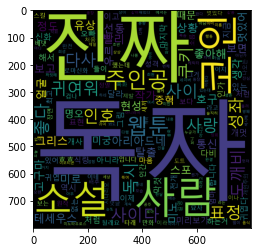

In [17]:
word_to_index = {}
index_to_word = {}

# 글자수 2이상인 단어만 추출 
for idx, (word, frequency) in enumerate(vocab_sorted) :
    if frequency < 2:
        continue
        
    if len(word) < 2: # 길이가 1이면 제외
        continue
    word_to_index[word] = idx +1
    index_to_word[idx+1] = word
print(list(word_to_index.keys())[:300])


cnt = Counter(list(word_to_index.keys())[:300])
# 한글로 워드클라우드 시각화
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(cnt)
plt.figure()
plt.imshow(gen)
wc.to_file("두 단어 이상만.png")

data = ' '.join(list(word_to_index.keys())[:300])

DATA_PATH = './data/'
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)    
    
# file_path = './data/자연어처리후_{filepath}_.txt'.format(filepath=filepath)
# f = open(file_path, 'w')
# f.write(data)
# f.close()
# print("\nSave Done.")